In [1]:
""" Script to test the flask API
"""
from ast import literal_eval
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Base variables and methods
url_base_path = "http://icarus.itleiria.pt:5000/" 

def get_rgb_from_yuv(raw, shape):
    """Convert YUV420 to RGB array!

    :param raw: bytearray received by API
    :type raw: bytearray
    """
    yuv = np.frombuffer(raw, dtype=np.uint8).reshape(shape)
    return cv2.cvtColor(yuv, cv2.COLOR_YUV420P2BGR)  # YV12)

def display_frame_raw(r_content,shape):
    # convert yuv to rgb
    if len(r_content) > 0:
        rgb = get_rgb_from_yuv(r_content, shape)
        # display image
        plt.imshow(rgb)
        plt.show()
    else:
        print("Received an empty bytearray!")


In [2]:
## 1. Select stream

# 1.1 Get stream and print results
print("1.1 Get stream and print results")
r = requests.get(url_base_path + "get_stream_list")
for i, s in enumerate(literal_eval(r.content.decode())):
    print({"name": s[0], "width": s[1], "height": s[2], "bytes_per_pixel": s[3], "number_of_layers": s[4]})

# 1.2 Select stream
print("1.2 Select stream")
r = requests.get(url_base_path + "select_stream?idx=4")  # post?
print(r.status_code)




1.1 Get stream and print results
{'name': 'Turtle', 'width': 3840, 'height': 1920, 'bytes_per_pixel': 1, 'number_of_layers': 1}
{'name': 'SkateboardTrick', 'width': 8192, 'height': 4096, 'bytes_per_pixel': 1, 'number_of_layers': 1}
{'name': 'Touvet', 'width': 3840, 'height': 1920, 'bytes_per_pixel': 1, 'number_of_layers': 2}
{'name': 'Foreman', 'width': 352, 'height': 288, 'bytes_per_pixel': 1, 'number_of_layers': 1}
{'name': 'Foreman (Multi-layer)', 'width': 352, 'height': 288, 'bytes_per_pixel': 1, 'number_of_layers': 3}
1.2 Select stream
200


In [3]:
## 3. Get projections (get_projections)
print("3. Get projections (get_projections)")
r = requests.get(url_base_path + "get_projection_list")
for i, s in enumerate(literal_eval(r.content.decode())):
    print({"initial": s[0], "name": s[1]})

3. Get projections (get_projections)
{'initial': 'ERP', 'name': 'Equi-rectangular projection'}
{'initial': 'CMP', 'name': 'Cube-map projection'}
{'initial': 'CISP', 'name': 'Compat ISP'}


4.1 Get projections (get_projections) - ERP
Frame info: {'width': 352, 'height': 288, 'Bpp': 1, 'byte_length': 152064}


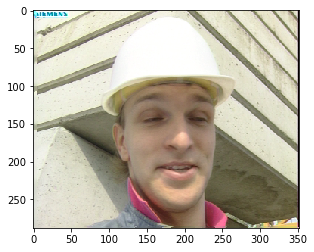

Frame info: {'width': 352, 'height': 288, 'Bpp': 1, 'byte_length': 152064}


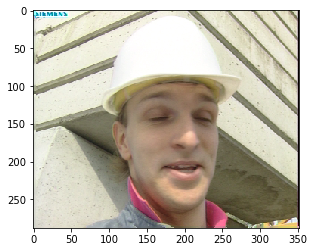

4.2 Get projections (get_projections) - CMP
Frame info: {'width': 390, 'height': 260, 'Bpp': 1, 'byte_length': 152100}


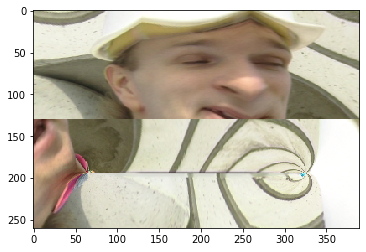

Frame info: {'width': 390, 'height': 260, 'Bpp': 1, 'byte_length': 152100}


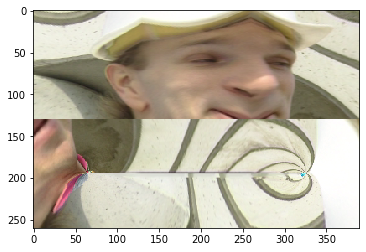

4.3 Get projections (get_projections) - CISP
Frame info: {'width': 386, 'height': 392, 'Bpp': 1, 'byte_length': 226968}


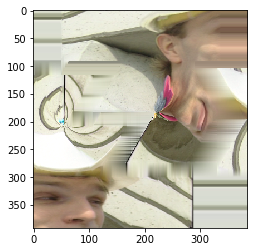

Frame info: {'width': 386, 'height': 392, 'Bpp': 1, 'byte_length': 226968}


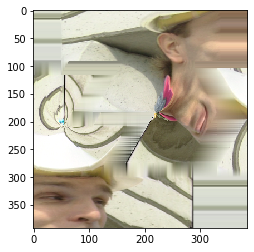

In [4]:
def get_frame(proj, layer=-1):
    """ Auxiliar method to: get_frame_info proj, get_frame_raw proj, display image."""
    # get frame info for ERP
    r_info = requests.get(url_base_path + "get_frame_info?projection="+proj+"&layer="+str(layer))
    frame_info = literal_eval(r_info.content.decode())
    print("Frame info:", frame_info)

    width = frame_info["width"]
    height = frame_info["height"]
    shape = (int(height * 1.5), width)

    # Get frame raw
    r_content = requests.get(url_base_path + "get_frame_raw?projection="+proj+"&layer="+str(layer), stream=True).content
    display_frame_raw(r_content,shape)

print("4.1 Get projections (get_projections) - ERP")
get_frame("ERP")
get_frame("ERP")

print("4.2 Get projections (get_projections) - CMP")
get_frame("CMP")
get_frame("CMP")

print("4.3 Get projections (get_projections) - CISP")
get_frame("CISP")
get_frame("CISP")


5.1 Get viewport
Frame info: {'width': 472, 'height': 432, 'Bpp': 1, 'byte_length': 305856}


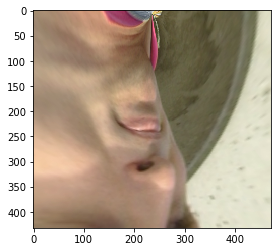

In [5]:
## 5. Test Viewport
def get_viewport(x, y, w, h):
    """ Auxiliar method to: get_frame_info proj, get_frame_raw proj, display image."""

    viewport_api_args = "coord=pixel"+"&x="+str(x)+"&y="+str(y)+"&width="+str(w)+"&height="+str(h)

    r_info = requests.get(url_base_path + "get_viewport_info?" + viewport_api_args)
    frame_info = literal_eval(r_info.content.decode())
    print("Frame info:", frame_info)

    width = frame_info["width"]
    height = frame_info["height"]
    shape = (int(height * 1.5), width)

    # Get viewport raw
    r_content = requests.get(url_base_path + "get_viewport_raw?" + viewport_api_args, stream=True).content
    display_frame_raw(r_content,shape)

print("5.1 Get viewport")
get_viewport( 2347, 792, 469, 429 )

6.1 Get projections in different layer (get_projections)
Frame info: {'width': 352, 'height': 288, 'Bpp': 1, 'byte_length': 152064}


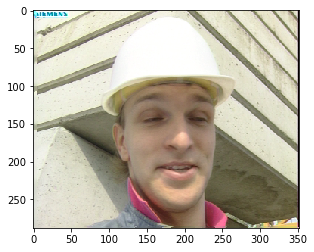

Frame info: {'width': 352, 'height': 288, 'Bpp': 1, 'byte_length': 152064}


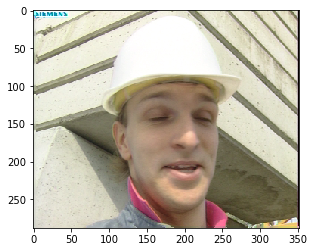

Frame info: {'width': 352, 'height': 288, 'Bpp': 1, 'byte_length': 152064}


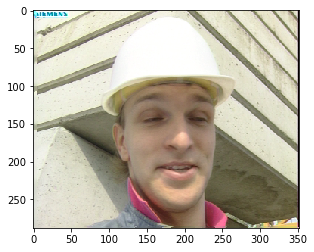

Frame info: {'width': 352, 'height': 288, 'Bpp': 1, 'byte_length': 152064}


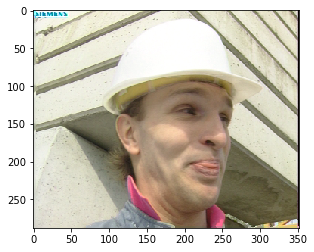

In [6]:
print("6.1 Get projections in different layer (get_projections)")
get_frame("ERP", 0 )
get_frame("ERP", 0 )
get_frame("ERP", 1 )
get_frame("ERP", 2 )

7.1 Select new stream stream
200
7.2 Get projection ERP
Frame info: {'width': 3840, 'height': 1920, 'Bpp': 1, 'byte_length': 11059200}


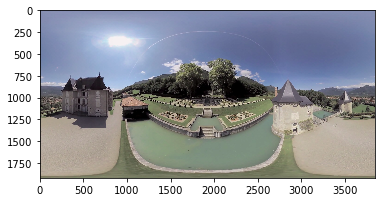

In [11]:
# 7.1 Select stream
print("7.1 Select new stream stream")
r = requests.get(url_base_path + "select_stream?idx=2")  # post?
print(r.status_code)

print("7.2 Get projection ERP")
get_frame("ERP")
print("7.2 Get projection ERP - Layer 1")
get_frame("ERP", layer = 1)